# Star Wars Survey

## 1.INTRODUCTION AND AIM

Stars wars is one of the saga movies with most fandom of all times and will be interesting to know what is the best movie of this saga as per fans opinion, does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?. This [data set](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) contains several columns with some question did to 11865 people about Star Wars movies

We will explore, clean, plot, analyze and answer some questions according to the opinion of the fans as follows:
what is the best movie?
what is the most viewed movie?
Which character do respondents like the most?
Which character do respondents dislike the most?
Which character is the most controversial (split between likes and dislikes)?
What is the best ranked movie for fans and no fans?
what is the the favourite and less favourite character for the fans and no fans?

## 2.Data exploration

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

As first step we have to remove invalid rows with Nan value, RespondentID is supposed to be a unique ID for each respondent but apparently there are rows with Nan value. but before let´s explore the data set

In [2]:
star_wars["RespondentID"].notnull().value_counts()

True     1186
False       1
Name: RespondentID, dtype: int64

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## 2.Data cleaning

Now let´s proceed to clean Nan values of RespondentID column

In [5]:
star_wars=star_wars[pd.notnull(star_wars["RespondentID"])]

In [6]:
star_wars["RespondentID"].notnull().value_counts()

True    1186
Name: RespondentID, dtype: int64

We have two important question did to fans:
* Have you seen any of the 6 films in the Star Wars franchise?
* Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent yes / no questions but NaN is equal to repondent chooses not to answer a question. we can make the data better to analyze turn Yes to True and No to False, it means turn responses to boolean values.

In [7]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

As we can see most of  respondents have seen any of the six movies of Star Wars but not all of them are considered as fans by themself, from 1186 respondents only 552  are considered as fans, No answered 350 and no considered as fans 284, we can relate NaN value like the respondents have not decided if they are fans or not.

In [9]:
series={"Yes":True,"No":False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(series)

In [10]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(series)

In [11]:
star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].map(series)

The next six columns represent a single checkbox question:
Which of the following Star Wars films have you seen? Please select all that apply
and the choices are:
* Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each column if the value in a cell is the name of the movie, that means the respondent was the movie, if value is NaN means did not answer or did not see the movie, we assume they did not see the movie.
We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. If the box has the name od the movie it will turn to True but if it is mark as NaN value it means False 

In [12]:
mapping={
"Star Wars: Episode I  The Phantom Menace":True, 
np.nan:False,
"Star Wars: Episode II  Attack of the Clones":True,
"Star Wars: Episode III  Revenge of the Sith":True,
"Star Wars: Episode IV  A New Hope":True,
"Star Wars: Episode V The Empire Strikes Back":True,
"Star Wars: Episode VI Return of the Jedi":True    
  }
for row in  star_wars.columns[3:9]:
    star_wars[row]=star_wars[row].map(mapping)

Following we will rename the column names as seen_1 for Star Wars: Episode I The Phantom Menace, seen_2 for Star Wars: Episode II Attack of the Clones, and so on.

In [13]:
mapping_names={
"Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1", 
"Unnamed: 4":"seen_2",
"Unnamed: 5":"seen_3",
"Unnamed: 6":"seen_4",
"Unnamed: 7":"seen_5",
"Unnamed: 8":"seen_6"
}
star_wars = star_wars.rename(columns=mapping_names)

In [14]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
* Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
* Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
* Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* How much the respondent liked Star Wars: Episode VI Return of the Jedi

So let´s to convert to float for a better analysis these columns and then rename them as we did in the previous step for a better comprehension

In [15]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [16]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [17]:
rank={
"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
"Unnamed: 10":"ranking_2",
"Unnamed: 11":"ranking_3",
"Unnamed: 12":"ranking_4",
"Unnamed: 13":"ranking_5",
"Unnamed: 14":"ranking_6"        
}
star_wars = star_wars.rename(columns=rank)

In [18]:
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

## 3. Ranking and views of Star Wars movies

Once we performed the previous step we can figure out which is the movie better ranked as per fans opinion, for this we need to find the mean for each movie and then for a better visualization we will plot the results

In [19]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

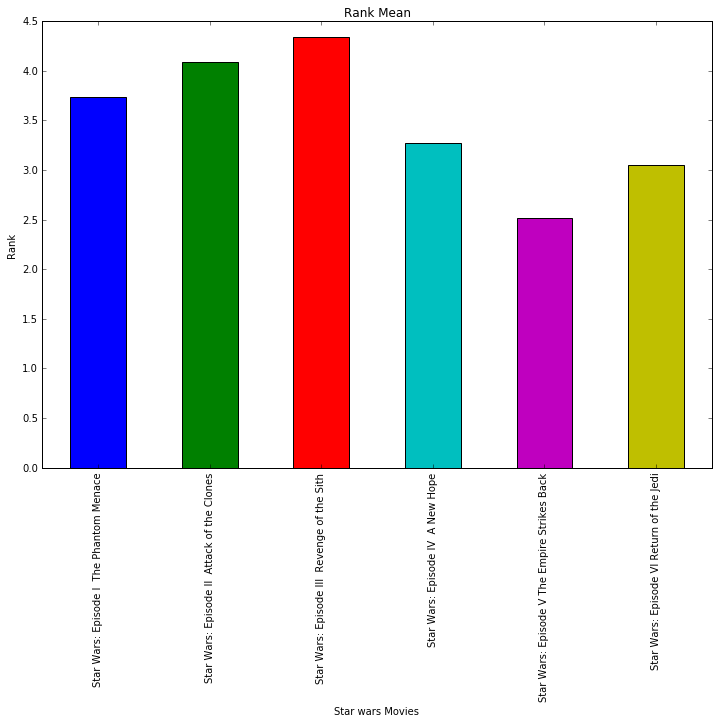

In [20]:
x_labels=["Star Wars: Episode I  The Phantom Menace", 
"Star Wars: Episode II  Attack of the Clones",
"Star Wars: Episode III  Revenge of the Sith",
"Star Wars: Episode IV  A New Hope",
"Star Wars: Episode V The Empire Strikes Back",
"Star Wars: Episode VI Return of the Jedi"]
plt.figure(figsize=(12, 8))
fig = star_wars[star_wars.columns[9:15]].mean().plot(kind='bar')
fig.set_title('Rank Mean')
fig.set_xlabel('Star wars Movies')
fig.set_ylabel('Rank')
fig.set_xticklabels(x_labels)

Remember that 1 is the best place of 6 movies, and 6 rank is the worst place. After plot the results we can see that Episode V: the empire strikes back followed by Episode VI: return of the jedi, the worst movie for the fans are Episode III revenge of the Sith

Now we will see how many of  respondents have seen each movie 

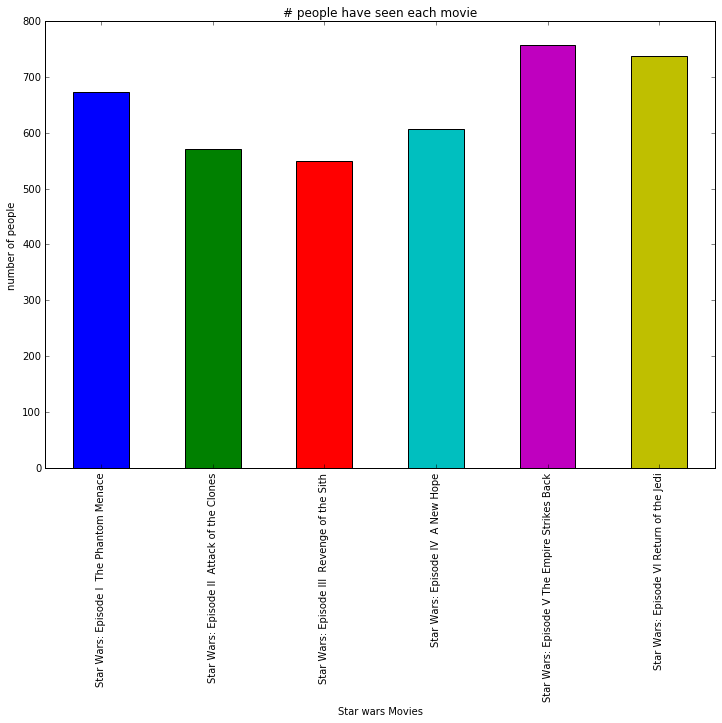

In [21]:
plt.figure(figsize=(12, 8))
fig = star_wars[star_wars.columns[3:9]].sum().plot(kind='bar')
fig.set_title('# people have seen each movie')
fig.set_xlabel('Star wars Movies')
fig.set_ylabel('number of people')
fig.set_xticklabels(x_labels)

The Episode V: the empire strikes back is the most viewed movie and with the better rank followed by Episode VI: return of the jedi.
The previous results show that the movie which is better rank is the most viewed for the fans in consequence, the Episode III revenge of the Sith is the worst movie and the less viewed

## 4. Ranking and views of Star Wars movies per genre

for this section we will discover if there is any difference of genre about ranking and views of each movie 

In [22]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

First let´s plot rank per genre for each star wars movie

In [23]:
females_mean_rank=females.iloc[:,9:15].mean()
males_mean_rank=males.iloc[:,9:15].mean()
print(females_mean_rank)
print('\n')
print(males_mean_rank)

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64


ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64


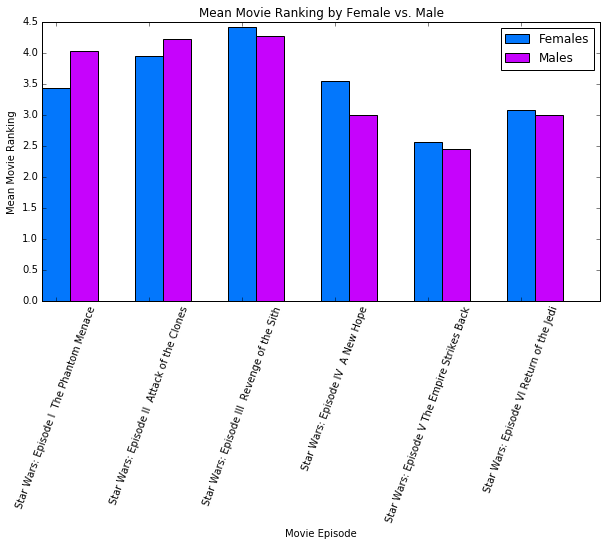

In [24]:
N = 6
# values of blue bars (height)
blue_bar = (females_mean_rank)
# values of purple bars (height)
purple_bar = (males_mean_rank)
# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))
# Width of a bar 
width = 0.3       
# Plotting
plt.bar(ind, blue_bar, width, color='#0377fc', label='Females')
plt.bar(ind + width, purple_bar, width, color='#c603fc', label='Males')

plt.xlabel('Movie Episode')
plt.ylabel('Mean Movie Ranking')
plt.title('Mean Movie Ranking by Female vs. Male')

# xticks()
plt.xticks(ind + width / 2, x_labels,rotation=70)

plt.legend(loc='best')
plt.show()

In [25]:
females_viewers=females.iloc[:,3:9].sum()
males_viewers=males.iloc[:,3:9].sum()
print(females_viewers)
print('\n')
print(males_viewers)

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64


seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64


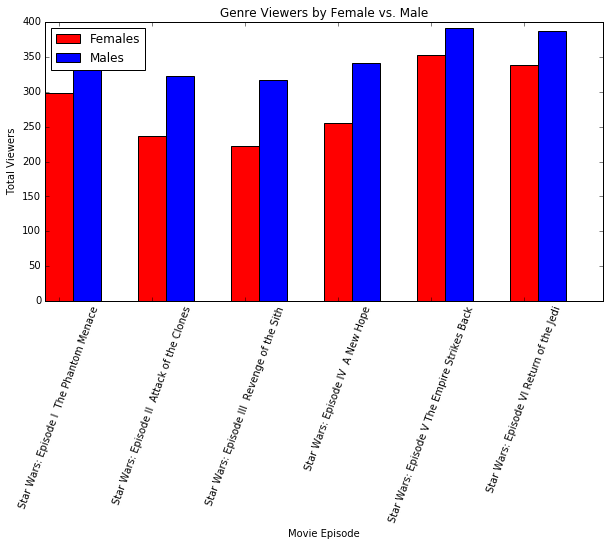

In [26]:
N = 6
# values of blue bars (height)
red_bar = (females_viewers)
# values of orange bars (height)
blue_bar = (males_viewers)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, red_bar, width, color='red', label='Females')
plt.bar(ind + width, blue_bar, width, color='blue', label='Males')

plt.xlabel('Movie Episode')
plt.ylabel('Total Viewers')
plt.title('Genre Viewers by Female vs. Male')

# xticks()
plt.xticks(ind + width / 2, x_labels,rotation=70)

plt.legend(loc='best')
plt.show()

The previous plots show that both for males and females the The Episode V: the empire strikes back is the best movie and the most viewed by them. there is not disctintion of females or males for the saga of stars wars, both have similar opinions.

## 5.Favourite characters

For the next columns we will figure out what is favourite character for the fans.
for this we will rename each column for a better comprehension as we did previously

In [27]:
star_wars.iloc[0:5,15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [28]:
characters={
"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":"Han Solo",
"Unnamed: 16":"Luke Skywalker",
"Unnamed: 17":"Princess Leia Organa",
"Unnamed: 18":"Anakin Skywalker",
"Unnamed: 19":"Obi Wan Kenobi",
"Unnamed: 20":"Emperor Palpatine",
"Unnamed: 21":"Darth Vader",
"Unnamed: 22":"Lando Calrissian",
"Unnamed: 23":"Boba Fett",
"Unnamed: 24":"C-3P0",
"Unnamed: 25":"R2 D2",
"Unnamed: 26":"Jar Jar Binks",
"Unnamed: 27":"Padme Amidala",
"Unnamed: 28":"Yoda"}
star_wars = star_wars.rename(columns=characters)

In [29]:
star_wars.iloc[0:5,15:29]

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


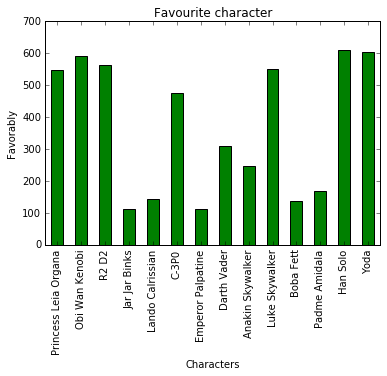

In [30]:
x_labels2=["Han Solo",
"Luke Skywalker",
"Princess Leia Organa",
"Anakin Skywalker",
"Obi Wan Kenobi",
"Emperor Palpatine",
"Darth Vader",
"Lando Calrissian",
"Boba Fett",
"C-3P0",
"R2 D2",
"Jar Jar Binks",
"Padme Amidala",
"Yoda"]

character= {"Han Solo":0,
"Luke Skywalker":0,
"Princess Leia Organa":0,
"Anakin Skywalker":0,
"Obi Wan Kenobi":0,
"Emperor Palpatine":0,
"Darth Vader":0,
"Lando Calrissian":0,
"Boba Fett":0,
"C-3P0":0,
"R2 D2":0,
"Jar Jar Binks":0,
"Padme Amidala":0,
"Yoda":0}

for row in star_wars[x_labels2]:
    if row in character:
        character[row] = len(star_wars[star_wars[row]=="Very favorably"])
        
characters=pd.DataFrame.from_dict(character, orient='index')
plt.figure(figsize=(12,5))
fig = characters.plot(kind='bar',color="green")
fig.set_title('Favourite character')
fig.set_xlabel('Characters')
fig.set_ylabel('Favorably')
fig.set_xticklabels(character)
fig.get_legend().set_visible(False)
plt.show()

The favourite character of the star wars for the fans is Han Solo followed closer by Yoda

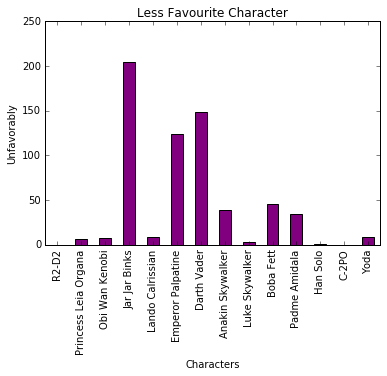

In [31]:
character2= {"Luke Skywalker":0,"Han Solo":0,
"Princess Leia Organa":0,
"Obi Wan Kenobi":0,
"Yoda":0,
"R2-D2":0,
"C-2PO":0,
"Anakin Skywalker":0,
"Darth Vader":0,
"Lando Calrissian":0,
"Padme Amidala":0,
"Boba Fett":0,
"Emperor Palpatine":0,
"Jar Jar Binks":0 }


for row in star_wars[x_labels2]:
    if row in character2:
        character2[row] = len(star_wars[star_wars[row]=="Very unfavorably"])
        
characters2=pd.DataFrame.from_dict(character2, orient='index')

plt.figure(figsize=(12, 20))
fig = characters2.plot(kind='bar',color="purple")
fig.set_title('Less Favourite Character')
fig.set_xlabel('Characters')
fig.set_ylabel('Unfavorably')
fig.get_legend().set_visible(False)
fig.set_xticklabels(character2)

The less favourite character of star wars is Jar Jar brinks and followed by the villains: Darth vader and Emperor Palpatine.
Also we can say that the most controvertial character is Darth Vader, the main villain of the Star Wars since in both plots ( less favourite character and favourite character) is an important character, it is between hate and love, almost 150 fans see him as Very unfavorably but almost 300 fans see him as Very favorably, it is the unique character that has both faces in both plots.

## 6. Favourite Movie Fans Vs No Fans

Now we will figure out if there is any difference about favourite movie between fans and no fans

In [32]:
fans_sw=star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==True]
not_fans_st=star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]==False]

In [33]:
fans_sw_mean=fans_sw.iloc[:,9:15].mean()
not_fans_st_mean=not_fans_st.iloc[:,9:15].mean()

print(fans_sw_mean)
print('\n')
print(not_fans_st_mean)

ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
ranking_4    2.932971
ranking_5    2.333333
ranking_6    2.829710
dtype: float64


ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64


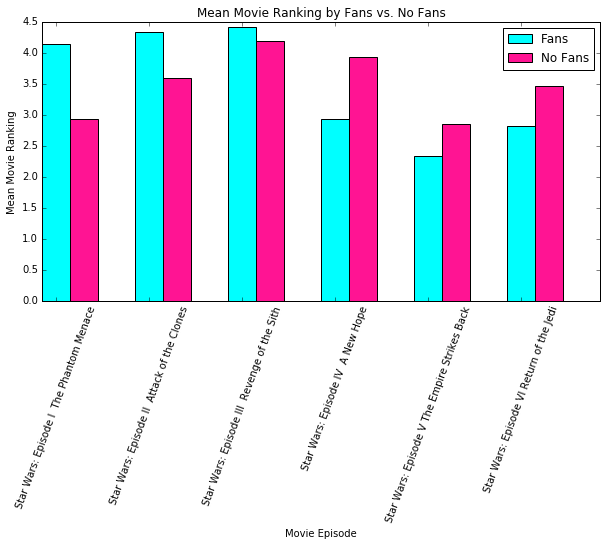

In [34]:
N = 6
# values of blue bars (height)
blue_bar = (fans_sw_mean)
# values of purple bars (height)
purple_bar = (not_fans_st_mean)
# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))
# Width of a bar 
width = 0.3       
# Plotting
plt.bar(ind, blue_bar, width, color='aqua', label='Fans')
plt.bar(ind + width, purple_bar, width, color='deeppink', label='No Fans')

plt.xlabel('Movie Episode')
plt.ylabel('Mean Movie Ranking')
plt.title('Mean Movie Ranking by Fans vs. No Fans')

# xticks()
plt.xticks(ind + width / 2, x_labels,rotation=70)

plt.legend(loc='best')
plt.show()

It is definitive, the episode V is the winner as best movie for fans and no fans of Star Wars and the episode 3 is the less favourite movie for fans and no fans.
plot shows something interesting, the first trilogy is the less ranked for the fans. However, it is different for no fans since they value more episode 1, 2 and 3 that fans and the last trilogy is less valued for no fans that fans. 

## 7. Favourite and less favourite character Fans Vs No Fans

the next we will figure out what is te most favorably character for the fans and no fans, also the most unfavorably. we measure this with percentage since there is more fans that no fans

In [35]:
for row in star_wars[x_labels2]:
    if row in character:
        character[row] = len(fans_sw[fans_sw[row]=="Very favorably"])
        
fav_cha_fans=pd.DataFrame.from_dict(character, orient='index')
fav_cha_fans=fav_cha_fans.reset_index()


for row in star_wars[x_labels2]:
    if row in character:
        character[row] = len(not_fans_st[not_fans_st[row]=="Very favorably"])
        
fav_cha_nofans=pd.DataFrame.from_dict(character, orient='index')
fav_cha_nofans=fav_cha_nofans.reset_index()

print(fav_cha_fans)
print("\n")
print(fav_cha_nofans)

                   index    0
0   Princess Leia Organa  410
1         Obi Wan Kenobi  448
2                  R2 D2  412
3          Jar Jar Binks   80
4       Lando Calrissian  124
5                  C-3P0  348
6      Emperor Palpatine   92
7            Darth Vader  243
8       Anakin Skywalker  188
9         Luke Skywalker  407
10             Boba Fett  120
11         Padme Amidala  142
12              Han Solo  470
13                  Yoda  455


                   index    0
0   Princess Leia Organa  137
1         Obi Wan Kenobi  143
2                  R2 D2  150
3          Jar Jar Binks   32
4       Lando Calrissian   18
5                  C-3P0  126
6      Emperor Palpatine   18
7            Darth Vader   67
8       Anakin Skywalker   57
9         Luke Skywalker  145
10             Boba Fett   18
11         Padme Amidala   26
12              Han Solo  140
13                  Yoda  150


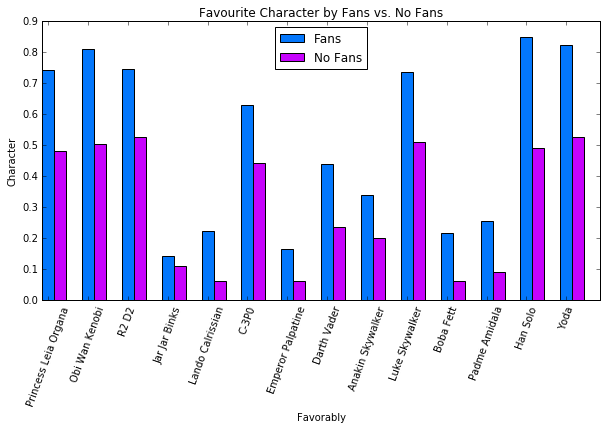

In [36]:
N = 14
# values of blue bars (height)
blue_bar = (fav_cha_fans[0]/552)
# values of purple bars (height)
purple_bar = (fav_cha_nofans[0]/284)
# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))
# Width of a bar 
width = 0.3       
# Plotting
plt.bar(ind, blue_bar, width, color='#0377fc', label='Fans')
plt.bar(ind + width, purple_bar, width, color='#c603fc', label='No Fans')

plt.xlabel('Favorably')
plt.ylabel('Character')
plt.title('Favourite Character by Fans vs. No Fans')

# xticks()
plt.xticks(ind + width / 2, character,rotation=70)

plt.legend(loc='best')
plt.show()

For the fans Han solo has a high favorably followed by Yoda and Obi Wan Kenobi.unlike fans the no fans are divided and there is not a clear winner. However, R2D2 and Yoda are the winner followed by Luke Skywalker it mark a clear difference between fans and non-fans

In [37]:
for row in star_wars[x_labels2]:
    if row in character:
        character[row] = len(fans_sw[fans_sw[row]=="Very unfavorably"])
        
unfav_cha_fans=pd.DataFrame.from_dict(character, orient='index')
unfav_cha_fans=unfav_cha_fans.reset_index()


for row in star_wars[x_labels2]:
    if row in character:
        character[row] = len(not_fans_st[not_fans_st[row]=="Very unfavorably"])
        
unfav_cha_nofans=pd.DataFrame.from_dict(character, orient='index')
unfav_cha_nofans=unfav_cha_nofans.reset_index()

print(unfav_cha_fans)
print("\n")
print(unfav_cha_nofans)

                   index    0
0   Princess Leia Organa    1
1         Obi Wan Kenobi    4
2                  R2 D2    2
3          Jar Jar Binks  162
4       Lando Calrissian    3
5                  C-3P0    3
6      Emperor Palpatine  102
7            Darth Vader   85
8       Anakin Skywalker   25
9         Luke Skywalker    0
10             Boba Fett   38
11         Padme Amidala   27
12              Han Solo    0
13                  Yoda    2


                   index   0
0   Princess Leia Organa   5
1         Obi Wan Kenobi   3
2                  R2 D2   4
3          Jar Jar Binks  42
4       Lando Calrissian   5
5                  C-3P0   4
6      Emperor Palpatine  22
7            Darth Vader  64
8       Anakin Skywalker  14
9         Luke Skywalker   3
10             Boba Fett   7
11         Padme Amidala   7
12              Han Solo   1
13                  Yoda   6


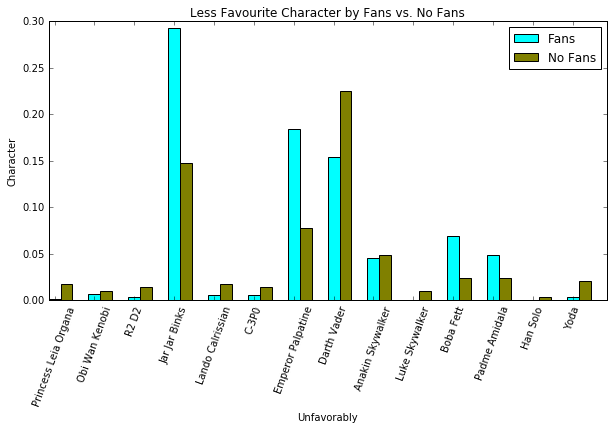

In [38]:
N = 14
# values of blue bars (height)
blue_bar = (unfav_cha_fans[0]/552)
# values of purple bars (height)
purple_bar = (unfav_cha_nofans[0]/284)
# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))
# Width of a bar 
width = 0.3       
# Plotting
plt.bar(ind, blue_bar, width, color='cyan', label='Fans')
plt.bar(ind + width, purple_bar, width, color='olive', label='No Fans')

plt.xlabel('Unfavorably')
plt.ylabel('Character')
plt.title('Less Favourite Character by Fans vs. No Fans')

# xticks()
plt.xticks(ind + width / 2, character,rotation=70)

plt.legend(loc='best')
plt.show()

almost 30% of fans say Jar Jar Binks is Very unfavorably folowed by Emperor Palpatine and Dart vader, ont he other hand, Darth vader is Very unfavorably for the no fans, followed by Jar Jar Binks and Emperor Palpatine.

## 8.FINDINGS AND CONCLUSION

After all this process we can say:
* Most of the respondents saw any of the 6 movies of Star Wars and most of them are fans of Star wars
* The movie Star Wars: Episode V The Empire Strikes Back is the most viewed and best ranked of all 6 for Fans, no fans, males and females, it is the absolutely winner in all aspects
* In general the favourite character is Han Solo and less favourite is Jar Jar Binks, it is the same for Fans. Hoewever, for the no fans the most favorably character is R2D2 and Yoda.
* Because the most of respondets are fans all plots ara trend by them.
* The last three movies have a increase number of viewers for females and males
* Males are more interesting on Star Wars movies
* The most controversial character is Darth Vader.

The most of respondents are fans of Star Wars and they mark a trend about favourite character, best movie etc. Also, there is not a big difference about favorite movie respect to genre.
